<h1 align='center'> Corona Virus OutBreak Analyis</h1>

Coronaviruses are types of viruses that typically affect the respiratory tracts of birds and mammals, including humans. Doctors associate them with the common cold, bronchitis, pneumonia, and severe acute respiratory syndrome (SARS), and they can also affect the gut.
These viruses are typically responsible for common colds more than serious diseases. However, coronaviruses are also behind some more severe outbreaks.
Over the last 70 years, scientists have found that coronaviruses can infect mice, rats, dogs, cats, turkeys, horses, pigs, and cattle. Sometimes, these animals can transmit coronaviruses to humans.

Most recently, authorities identified a new coronavirus outbreak in China that has now reached other countries. It has the name coronavirus disease 2019, or COVID-19.<br><br>
![](https://cdn.kalingatv.com/wp-content/uploads/2020/02/coronavirus-Youtube-750x430.jpg)
<br><br>
What is a coronavirus?

Researchers first isolated a coronavirus in 1937. They found a coronavirus responsible for an infectious bronchitis virus in birds that had the ability to devastate poultry stocks.
Scientists first found evidence of human coronaviruses (HCoV) in the 1960s in the noses of people with the common cold. Two human coronaviruses are responsible for a large proportion of common colds: OC43 and 229E.
The name “coronavirus” comes from the crown-like projections on their surfaces. “Corona” in Latin means “halo” or “crown.”
Among humans, coronavirus infections most often occur during the winter months and early spring. People regularly become ill with a cold due to a coronavirus and may catch the same one about 4 months later.
This is because coronavirus antibodies do not last for a long time. Also, the antibodies for one strain of coronavirus may be ineffective against another one.


COVID-19
In 2019, the Centers for Disease Control and Prevention (CDC) started monitoring the outbreak of a new coronavirus, SARS-CoV-2, which causes respiratory illness now known as COVID-19. Authorities first identified the virus in Wuhan, China.
More than 74,000 people have contracted the virus in China. Health authorities have identified many other people with COVID-19 around the world, including many in the United States. On January 31, 2020, the virus passed from one person to another in the U.S.
The World Health Organization (WHO) have declared a public health emergency relating to COVID-19.
Information on the virus is scarce at present. In the past, respiratory conditions that develop from coronaviruses, such as SARS and MERS, have spread through close contacts.


References: https://www.medicalnewstoday.com/articles/256521#definition

# Import Libraries

In [1]:
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

# Import Dataset

In [2]:
conf_df = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')
deaths_df = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv')
recv_df = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv')

In [3]:
conf_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


# Data Wrangling

In [4]:
dates = ['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', 
         '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', 
         '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', 
         '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20']

conf_df_long = conf_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

deaths_df_long = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

recv_df_long = recv_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')

full_table = pd.concat([conf_df_long, deaths_df_long['Deaths'], recv_df_long['Recovered']], 
                       axis=1, sort=False)
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0


# Data Cleaning and Preprocessing

In [5]:
# converting to proper data format
full_table['Date'] = pd.to_datetime(full_table['Date'])
full_table['Recovered'] = full_table['Recovered'].astype('int')

# replacing Mainland china with just China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values with 0 in columns ('Confirmed', 'Deaths', 'Recovered')
full_table[['Confirmed', 'Deaths', 'Recovered']] = full_table[['Confirmed', 'Deaths', 'Recovered']].fillna(0)
full_table[['Province/State']] = full_table[['Province/State']].fillna('NA')

# cases in the Diamond Princess cruise ship
ship = full_table[full_table['Province/State']=='Diamond Princess cruise ship']

# full table
full_table = full_table[full_table['Province/State']!='Diamond Princess cruise ship']
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NA,Thailand,15.0000,101.0000,2020-01-22,2,0,0
1,NA,Japan,36.0000,138.0000,2020-01-22,2,0,0
2,NA,Singapore,1.2833,103.8333,2020-01-22,0,0,0
3,NA,Nepal,28.1667,84.2500,2020-01-22,0,0,0
4,NA,Malaysia,2.5000,112.5000,2020-01-22,0,0,0


In [6]:
# derived dataframes
china = full_table[full_table['Country/Region']=='China']
row = full_table[full_table['Country/Region']!='China']

full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()
china_latest = full_latest[full_latest['Country/Region']=='China']
row_latest = full_latest[full_latest['Country/Region']!='China']

full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
china_latest_grouped = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

# EDA

## Current Situation

In [7]:
temp = full_latest.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered'].max()
temp.style.background_gradient(cmap='Pastel1_r')

,,Confirmed,Deaths,Recovered
Country/Region,Province/State,,,
Afghanistan,NA,0,0,0
Albania,NA,0,0,0
Algeria,NA,0,0,0
Andorra,NA,0,0,0
Antigua and Barbuda,NA,0,0,0
Argentina,NA,0,0,0
Armenia,NA,0,0,0
Aruba,NA,0,0,0
Australia,Australian Capital Territory,0,0,0


## Top 10 Countries with most no. of reported cases

In [8]:
temp_f = full_latest_grouped[['Country/Region', 'Confirmed']]
temp_f = temp_f.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f.reset_index(drop=True)
temp_f.head(10).style.background_gradient(cmap='Pastel1_r')

,Country/Region,Confirmed
0,China,74619
1,Cruise Ship,621
2,Japan,84
3,Singapore,84
4,Thailand,35
5,"Korea, South",31
6,Taiwan*,23
7,Malaysia,22
8,Vietnam,16
9,Germany,16


* Massive number of cases are reported in Mainland China Compared to reset of the world
* The next few countries are infact are the neighbours of China

## Countries with deaths reported

In [9]:
temp_flg = full_latest_grouped[['Country/Region', 'Deaths']]
temp_flg = temp_flg.sort_values(by='Deaths', ascending=False)
temp_flg = temp_flg.reset_index(drop=True)
temp_flg = temp_flg[temp_flg['Deaths']>0]
temp_flg.style.background_gradient(cmap='Pastel1_r')

,Country/Region,Deaths
0,China,2116
1,Iran,2
2,France,1
3,Philippines,1
4,Japan,1
5,Taiwan*,1


* Outside China, there hasn't been a lot of deaths due to COVID-19 has reported

## Countries with all the cases recovered

In [10]:
# Countries with all the cases recovered
temp = row_latest_grouped[row_latest_grouped['Confirmed']==row_latest_grouped['Recovered']]
temp = temp[['Country/Region', 'Confirmed', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

,Country/Region,Confirmed,Recovered
0,India,3,3
1,Spain,2,2
2,Russia,2,2
3,Cambodia,1,1
4,Nepal,1,1
5,Finland,1,1
6,Belgium,1,1
7,Sri Lanka,1,1
8,Afghanistan,0,0
9,Netherlands,0,0


## Most Recent Stats

In [11]:
temp = full_table.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum()
temp = temp.reset_index()
temp = temp.sort_values('Date', ascending=False)
temp.head(1).style.background_gradient(cmap='Pastel1')

,Date,Confirmed,Deaths,Recovered
28,2020-02-19 00:00:00,75639,2122,16121


* There are more recovered cases than deaths at this point of time

## Hubei - China - World

In [12]:
fig.update_traces?

Object `fig.update_traces` not found.


In [13]:
def location(row):
    if row['Country/Region']=='China':
        if row['Province/State']=='Hubei':
            return 'Hubei'
        else:
            return 'Other Chinese Provinces'
    else:
        return 'Rest of the World'

temp = full_latest.copy()
temp['Region'] = temp.apply(location, axis=1)
temp = temp.groupby('Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
temp = temp.melt(id_vars='Region', value_vars=['Confirmed', 'Deaths', 'Recovered'], 
                 var_name='Case', value_name='Count').sort_values('Count')
temp.head()

fig = px.bar(temp, y='Region', x='Count', color='Case', barmode='group', orientation='h',
             height=500, width=1000, text='Count', title='Hubei - China - World', 
             color_discrete_sequence= ['#EF553B', '#00CC96', '#636EFA'])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

## Count of Cases

In [14]:
# Reading the dataset
data= pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [15]:
# Let's look at the various columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5632 entries, 0 to 5631
Data columns (total 8 columns):
SNo                5632 non-null int64
ObservationDate    5632 non-null object
Province/State     3456 non-null object
Country/Region     5632 non-null object
Last Update        5632 non-null object
Confirmed          5632 non-null float64
Deaths             5632 non-null float64
Recovered          5632 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 352.1+ KB


In [16]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,5632.000000,5632.000000,5632.000000,5632.000000
mean,2816.500000,582.415305,18.335760,213.634766
std,1625.962689,4935.578984,195.698066,2363.112194
min,1.000000,0.000000,0.000000,0.000000
25%,1408.750000,2.000000,0.000000,0.000000
50%,2816.500000,10.000000,0.000000,0.000000
75%,4224.250000,94.000000,1.000000,12.000000
max,5632.000000,67790.000000,3075.000000,52960.000000


In [17]:
# Convert Last Update column to datetime64 format

data['ObservationDate'] = data['ObservationDate'].apply(pd.to_datetime)
data.drop(['SNo'],axis=1,inplace=True)

#Set Date column as the index column.
#data.set_index('Last Update', inplace=True)
data.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Countries which have been affected by the Coronavirus(2019-nCoV)till now

In [18]:
countries = data['Country/Region'].unique().tolist()
print(countries)

print("\nTotal countries affected by virus: ",len(countries))

['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Saint Barthelemy', 

In [19]:
#Combining China and Mainland China cases

data['Country/Region'].replace({'Mainland China':'China'},inplace=True)
countries = data['Country/Region'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))

['China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan', 'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukraine', 'Saint Barthelemy', 'Hungary'

## Current status worldwide

In [20]:
# Creating a dataframe with total no of confirmed cases for every country
Number_of_countries = len(data['Country/Region'].value_counts())


cases = pd.DataFrame(data.groupby('Country/Region')['Confirmed'].sum())
cases['Country/Region'] = cases.index
cases.index=np.arange(1,Number_of_countries+1)

global_cases = cases[['Country/Region','Confirmed']]
#global_cases.sort_values(by=['Confirmed'],ascending=False)
global_cases

,Country/Region,Confirmed
1,Azerbaijan,1.0
2,"('St. Martin',)",2.0
3,Afghanistan,58.0
4,Albania,118.0
5,Algeria,238.0
...,...,...
152,Uruguay,4.0
153,Vatican City,4.0
154,Venezuela,2.0
155,Vietnam,798.0


## A Closer look at China's condition

In [21]:
#Mainland China
China = data[data['Country/Region']=='China']
China

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
5463,2020-03-14,Inner Mongolia,China,2020-03-11T03:53:03,75.0,1.0,71.0
5464,2020-03-14,Ningxia,China,2020-03-14T09:53:08,75.0,0.0,73.0
5519,2020-03-14,Qinghai,China,2020-03-11T02:18:14,18.0,0.0,18.0
5537,2020-03-14,Macau,China,2020-03-11T18:52:03,10.0,0.0,10.0


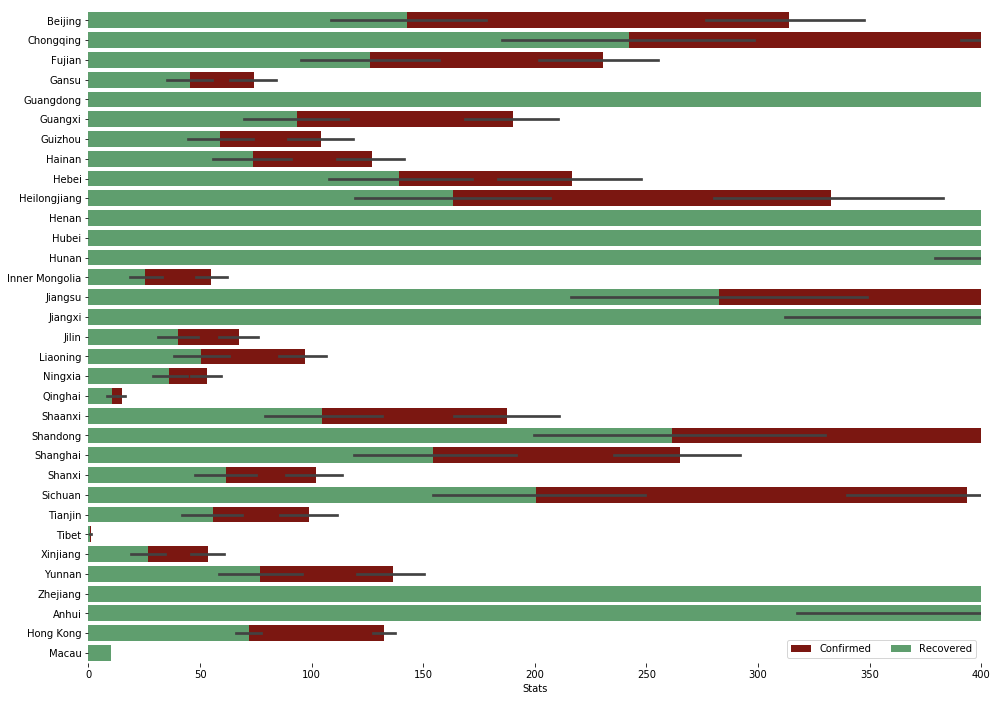

In [22]:
##Let's look at the Confirmed vs Recovered figures of Provinces of China other than Hubei
f, ax = plt.subplots(figsize=(16, 12))

sns.set_color_codes("dark")
sns.barplot(x="Confirmed", y="Province/State", data=China[1:],
            label="Confirmed", color="r")

sns.set_color_codes("deep")
sns.barplot(x="Recovered", y="Province/State", data=China[1:],
            label="Recovered", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)

## Coorelation between different attributes

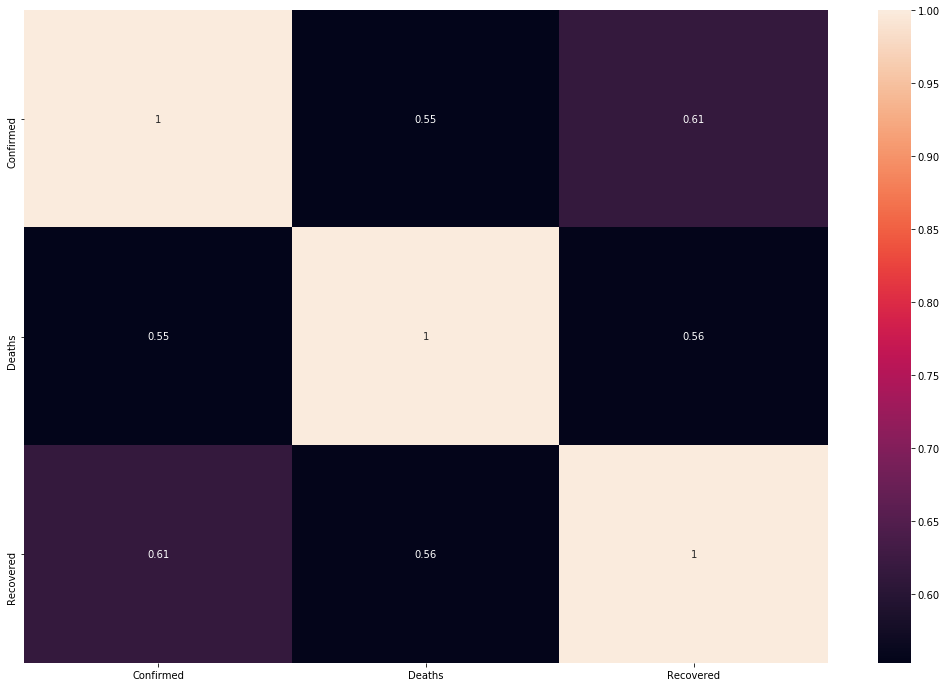

In [23]:
#Get Correlation between different variables
corr = data.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)

In [24]:
'''A Function To Plot Pie Plot using Plotly'''

def pie_plot(cnt_srs, colors, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

In [25]:
data.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,China,1/22/2020 17:00,0.0,0.0,0.0


In [26]:
'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

## State

In [27]:
py.iplot([pie_plot(data['Province/State'].value_counts(), ['cyan', 'gold'], 'State')])

## Country

In [28]:
py.iplot([pie_plot(data['Country/Region'].value_counts(), ['cyan', 'gold'], 'Country')])

## Confirmed Cases

In [29]:
py.iplot([pie_plot(data['Confirmed'].value_counts(), ['cyan', 'gold'], 'Confirmed')])

## Death Cases

In [30]:
py.iplot([pie_plot(data['Deaths'].value_counts(), ['cyan', 'gold'], 'Deaths')])

## Recovered Cases

In [31]:
py.iplot([pie_plot(data['Recovered'].value_counts(), ['cyan', 'gold'], 'Recovered')])

## Wordcloud of Countries

In [32]:
from wordcloud import WordCloud

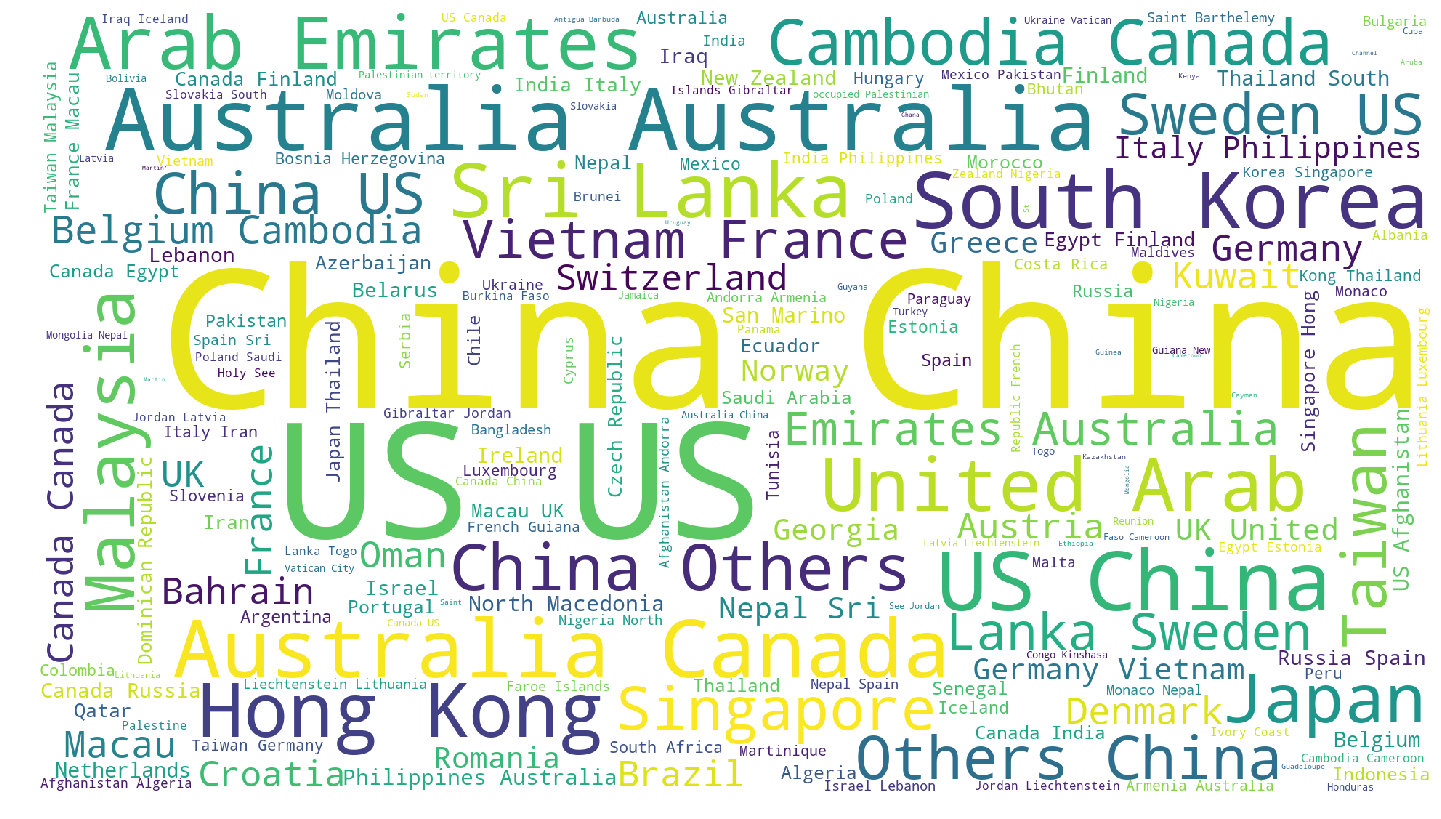

In [33]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data['Country/Region']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

Text(0.5, 1.0, 'Location')

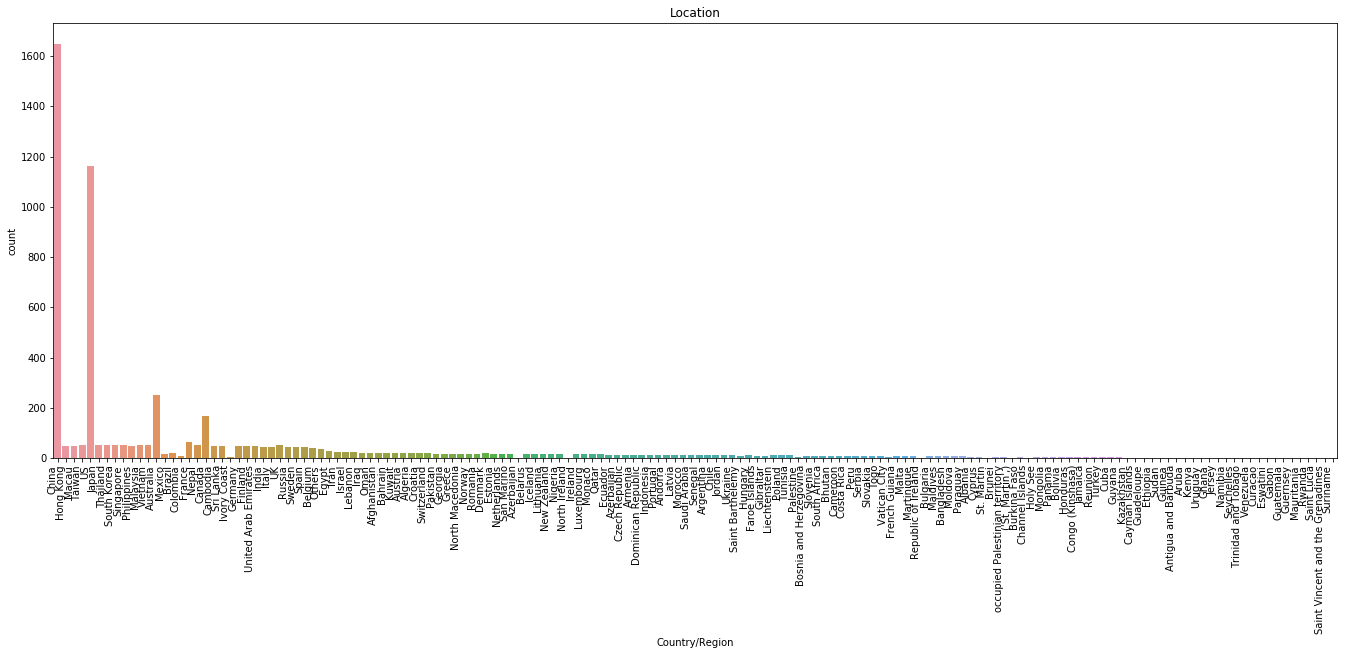

In [34]:
# Location
sns.countplot(data['Country/Region'])
sns.countplot(data['Country/Region']).set_xticklabels(sns.countplot(data['Country/Region']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(23,8)
plt.title('Location')

# Global Spread of the Coronavirus Over Time 

In [35]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'], errors='coerce')

In [36]:
from datetime import date
data['ObservationDate'] = data['ObservationDate'].dt.date
spread = data[data['ObservationDate'] > pd.Timestamp(date(2020,1,21))]
spread_gl = spread.groupby('ObservationDate')["Confirmed", "Deaths", "Recovered"].sum().reset_index()
from plotly.subplots import make_subplots
#fig = make_subplots(rows=1, cols=3, subplot_titles=("Confirmed", "Deaths", "Recovered"))

trace1 = go.Scatter(
                x=spread_gl['ObservationDate'],
                y=spread_gl['Confirmed'],
                name="Confirmed",
                line_color='orange',
                opacity=0.9)
data1 = [trace1];
layout = dict(title = '<b>Confirmed</b>',
              xaxis= dict(title= 'Date',ticklen= 10,zeroline= False),
              yaxis= dict(title = 'No. of Cases', ticklen=5, zeroline = False)
             )
fig = dict(data = data1, layout = layout)
iplot(fig)

In [37]:
trace2 = go.Scatter(
                x=spread_gl['ObservationDate'],
                y=spread_gl['Deaths'],
                name="Deaths",
                line_color='red',
                opacity=0.9)
data2 = [trace2];
layout = dict(title = '<b>Deaths</b>',
              xaxis= dict(title= 'Date',ticklen= 5,zeroline= False),
              yaxis= dict(title = 'No. of Cases', ticklen=5, zeroline = False)
             )
fig = dict(data = data2, layout = layout)
iplot(fig)


In [38]:
trace3 = go.Scatter(
                x=spread_gl['ObservationDate'],
                y=spread_gl['Recovered'],
                name="Recovered",
                line_color='green',
                opacity=0.9)
data3 = [trace3];
layout = dict(title = '<b>Recovered</b>',
              xaxis= dict(title= 'Date',ticklen= 5,zeroline= False),
              yaxis= dict(title = 'No. of Cases', ticklen=5, zeroline = False)
             )
fig = dict(data = data3, layout = layout)
iplot(fig)


In [39]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'], errors='coerce')

In [40]:
data['ObservationDate'] = data['ObservationDate'].dt.date
spread = data[data['ObservationDate'] > pd.Timestamp(date(2020,1,21))]
spread_gl = spread.groupby('ObservationDate')["Confirmed", "Deaths", "Recovered"].sum().reset_index()
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=("Confirmed", "Deaths", "Recovered"))


china_data = spread[spread['Country/Region']=='China']
date_con_ch = china_data.groupby('ObservationDate')['Confirmed','Deaths','Recovered'].sum().reset_index()

In [41]:
spread

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
5627,2020-03-14,"Virgin Islands, U.S.",US,2020-03-14T16:15:18,1.0,0.0,0.0
5628,2020-03-14,Gibraltar,UK,2020-03-14T16:33:03,1.0,0.0,1.0
5629,2020-03-14,Diamond Princess cruise ship,Australia,2020-03-14T02:33:04,0.0,0.0,0.0
5630,2020-03-14,West Virginia,US,2020-03-10T02:33:04,0.0,0.0,0.0


In [42]:
china_data

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
5463,2020-03-14,Inner Mongolia,China,2020-03-11T03:53:03,75.0,1.0,71.0
5464,2020-03-14,Ningxia,China,2020-03-14T09:53:08,75.0,0.0,73.0
5519,2020-03-14,Qinghai,China,2020-03-11T02:18:14,18.0,0.0,18.0
5537,2020-03-14,Macau,China,2020-03-11T18:52:03,10.0,0.0,10.0


In [43]:
date_con_ch

,ObservationDate,Confirmed,Deaths,Recovered
0,2020-01-22,547.0,17.0,28.0
1,2020-01-23,639.0,18.0,30.0
2,2020-01-24,916.0,26.0,36.0
3,2020-01-25,1399.0,42.0,39.0
4,2020-01-26,2062.0,56.0,49.0
5,2020-01-27,2863.0,82.0,58.0
6,2020-01-28,5494.0,131.0,101.0
7,2020-01-29,6070.0,133.0,120.0
8,2020-01-30,8124.0,171.0,135.0
9,2020-01-31,9783.0,213.0,214.0


## Spread of the Coronavirus Over Time In China

In [44]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'], errors='coerce')

In [45]:
data['ObservationDate'] = data['ObservationDate'].dt.date
spread = data[data['ObservationDate'] > pd.Timestamp(date(2020,1,21))]
spread_gl = spread.groupby('ObservationDate')["Confirmed", "Deaths", "Recovered"].sum().reset_index()
from plotly.subplots import make_subplots
#fig = make_subplots(rows=1, cols=3, subplot_titles=("Confirmed", "Deaths", "Recovered"))

trace4 = go.Scatter(
                x=date_con_ch['ObservationDate'],
                y=date_con_ch['Confirmed'],
                name="Confirmed",
                line_color='orange',
                opacity=0.8)
data4 = [trace4];
layout = dict(title = '<b>Confirmed</b>',
              xaxis= dict(title= 'Date',ticklen= 10,zeroline= False),
              yaxis= dict(title = 'No. of Cases', ticklen=5, zeroline = False)
             )
fig = dict(data = data4, layout = layout)
iplot(fig)

In [46]:
trace5 = go.Scatter(
                x=date_con_ch['ObservationDate'],
                y=date_con_ch['Deaths'],
                name="Deaths",
                line_color='red',
                opacity=0.8)
data5 = [trace5];
layout = dict(title = '<b>Recovered</b>',
              xaxis= dict(title= 'Date',ticklen= 5,zeroline= False),
              yaxis= dict(title = 'No. of Cases', ticklen=5, zeroline = False)
             )
fig = dict(data = data5, layout = layout)
iplot(fig)


In [47]:
trace6 = go.Scatter(
                x=date_con_ch['ObservationDate'],
                y=date_con_ch['Recovered'],
                name="Recovered",
                line_color='green',
                opacity=0.8)
data6 = [trace6];
layout = dict(title = '<b>Recovered</b>',
              xaxis= dict(title= 'Date',ticklen= 5,zeroline= False),
              yaxis= dict(title = 'No. of Cases', ticklen=5, zeroline = False)
             )
fig = dict(data = data6, layout = layout)
iplot(fig)


## End of the Notebook

### I will try to update this notebook within every few days
## Last Update 15th March 2020

<h1>Please Upvote If you found these helpful</h1>